In [196]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [197]:
df_full = pd.read_csv('jobs.csv')

In [198]:
df_full.head()

,Unnamed: 0,job_remote,job_des,job_loc,job_type,sql,power,c,micro,sas,...,python,java,r,tableau,spark,working_years,degree,data_analyst,salary,review
0,1,Remote,Apply Statistical and Machine Learning methods...,unknown,mixed,0,0,0,0,0,...,0,0,0,1,0,0,Master,1,47.22,0
1,18,Remote,Looking to take the next step in your IT caree...,south,Full time,0,0,0,0,0,...,0,0,0,0,0,5,Master,1,74.41,2
2,20,Remote,Are you an Excel Expert? Are you detail orient...,unknown,mixed,0,0,0,1,0,...,0,0,0,0,0,0,NotSpecified,1,45.00,0
3,26,Remote,Company Info:\n\nWe help companies test and im...,south,mixed,0,0,0,0,0,...,0,0,0,0,0,0,Master,1,50.00,1288
4,39,Remote,DCI is a rapidly growing media company publish...,unknown,Full time,1,0,0,0,0,...,0,0,0,0,0,0,Bachelor,0,30.56,8


In [199]:
df_full.drop(columns = ['Unnamed: 0','review','job_des'], inplace = True)

In [200]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   job_remote     645 non-null    object 
 1   job_loc        645 non-null    object 
 2   job_type       645 non-null    object 
 3   sql            645 non-null    int64  
 4   power          645 non-null    int64  
 5   c              645 non-null    int64  
 6   micro          645 non-null    int64  
 7   sas            645 non-null    int64  
 8   spss           645 non-null    int64  
 9   xml            645 non-null    int64  
 10  etl            645 non-null    int64  
 11  comm           645 non-null    int64  
 12  python         645 non-null    int64  
 13  java           645 non-null    int64  
 14  r              645 non-null    int64  
 15  tableau        645 non-null    int64  
 16  spark          645 non-null    int64  
 17  working_years  645 non-null    int64  
 18  degree    

In [201]:
df_full.describe()

,sql,power,c,micro,sas,spss,xml,etl,comm,python,java,r,tableau,spark,working_years,data_analyst,salary
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,0.258915,0.040310,0.040310,0.379845,0.029457,0.018605,0.007752,0.029457,0.660465,0.099225,0.032558,0.027907,0.114729,0.003101,2.449612,0.255814,44.436558
std,0.438379,0.196838,0.196838,0.485725,0.169216,0.135229,0.087771,0.169216,0.473919,0.299196,0.177615,0.164834,0.318942,0.055641,2.703119,0.436656,19.401807
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,41.670000
75%,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000,54.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.000000,1.000000,125.000000


In [202]:
df_full_cat = df_full.loc[:,['job_remote','job_loc','job_type','degree']]
df_full_dum = pd.get_dummies(df_full_cat)
df_full_dum.drop(columns = ['job_loc_unknown','job_type_unknown','degree_NotSpecified'],inplace = True)

In [203]:
df_prepared = pd.concat([df_full.drop(columns = ['job_remote','job_loc','job_type','degree']), df_full_dum],axis = 1)

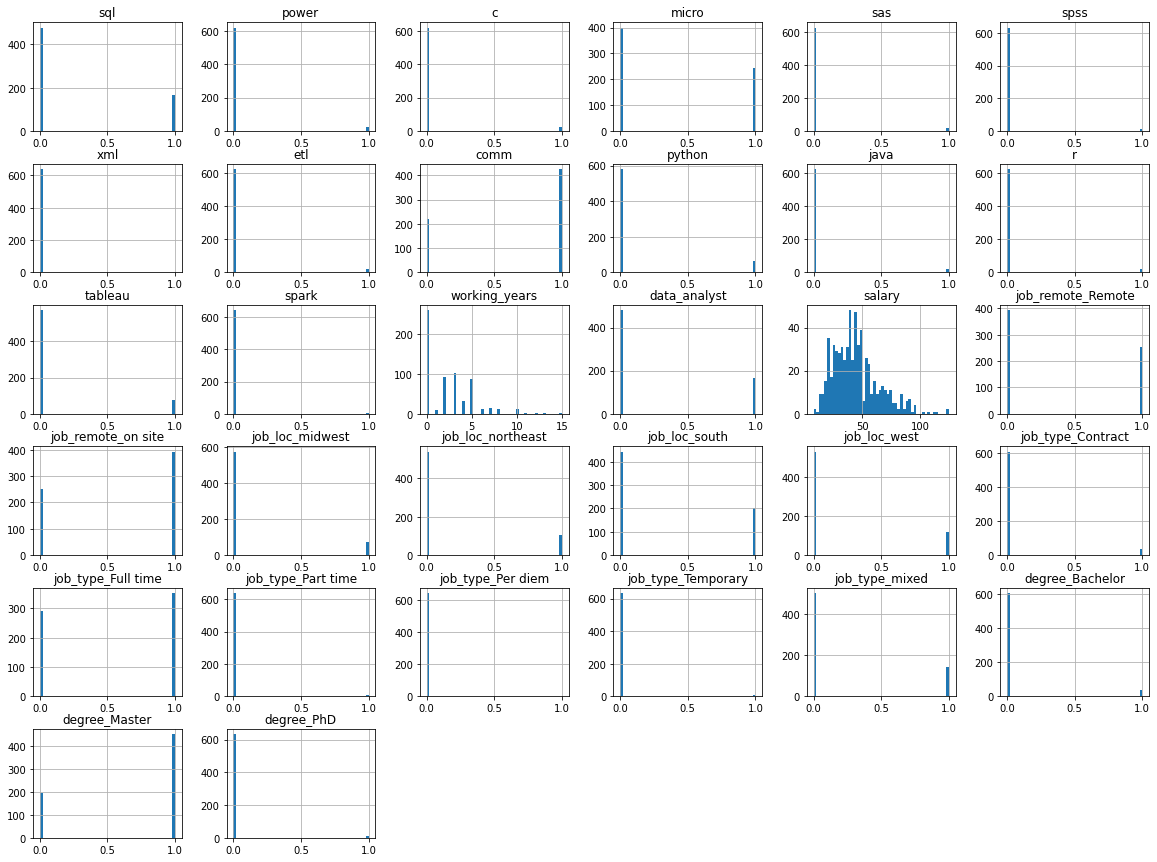

In [204]:
%matplotlib inline
df_prepared.hist(bins = 50, figsize = (20,15))
plt.show()

In [205]:
# very less PhD samples, we will then merge Master and PhD as Graduate
df_prepared_copy = df
df_prepared['degree_Graduate'] = df_prepared['degree_Master']+df_prepared['degree_PhD']
df_prepared.drop(columns = ['degree_Master','degree_PhD'], inplace = True)


In [207]:
df_prepared.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sql                 645 non-null    int64  
 1   power               645 non-null    int64  
 2   c                   645 non-null    int64  
 3   micro               645 non-null    int64  
 4   sas                 645 non-null    int64  
 5   spss                645 non-null    int64  
 6   xml                 645 non-null    int64  
 7   etl                 645 non-null    int64  
 8   comm                645 non-null    int64  
 9   python              645 non-null    int64  
 10  java                645 non-null    int64  
 11  r                   645 non-null    int64  
 12  tableau             645 non-null    int64  
 13  spark               645 non-null    int64  
 14  working_years       645 non-null    int64  
 15  data_analyst        645 non-null    int64  
 16  salary  

In [128]:
## Create Test Set
train_set, test_set = train_test_split(df_prepared, test_size = 0.2, random_state = 89)

In [129]:
df = train_set.copy()

In [130]:
corr_mat = df.corr()
from pandas.plotting import scatter_matrix
corr_mat['salary'].sort_values(ascending = False)

salary                1.000000
working_years         0.234653
tableau               0.138667
python                0.125498
sql                   0.120978
etl                   0.117459
c                     0.091408
power                 0.091408
java                  0.090637
data_analyst          0.080519
spark                 0.064588
r                     0.044771
job_type_Part time    0.028053
job_loc_west          0.020144
degree_Graduate       0.017794
job_loc_northeast     0.006338
job_remote_on site    0.003699
job_loc_south        -0.002208
xml                  -0.002933
job_remote_Remote    -0.003699
comm                 -0.005677
job_type_Full time   -0.007815
sas                  -0.008594
spss                 -0.025560
degree_Bachelor      -0.026057
job_type_Contract    -0.030892
job_loc_midwest      -0.037513
job_type_mixed       -0.041313
job_type_Temporary   -0.063323
micro                -0.076570
job_type_Per diem    -0.077557
Name: salary, dtype: float64

array([[<AxesSubplot:xlabel='working_years', ylabel='working_years'>,
        <AxesSubplot:xlabel='tableau', ylabel='working_years'>,
        <AxesSubplot:xlabel='python', ylabel='working_years'>,
        <AxesSubplot:xlabel='etl', ylabel='working_years'>,
        <AxesSubplot:xlabel='degree_Graduate', ylabel='working_years'>],
       [<AxesSubplot:xlabel='working_years', ylabel='tableau'>,
        <AxesSubplot:xlabel='tableau', ylabel='tableau'>,
        <AxesSubplot:xlabel='python', ylabel='tableau'>,
        <AxesSubplot:xlabel='etl', ylabel='tableau'>,
        <AxesSubplot:xlabel='degree_Graduate', ylabel='tableau'>],
       [<AxesSubplot:xlabel='working_years', ylabel='python'>,
        <AxesSubplot:xlabel='tableau', ylabel='python'>,
        <AxesSubplot:xlabel='python', ylabel='python'>,
        <AxesSubplot:xlabel='etl', ylabel='python'>,
        <AxesSubplot:xlabel='degree_Graduate', ylabel='python'>],
       [<AxesSubplot:xlabel='working_years', ylabel='etl'>,
        <AxesSu

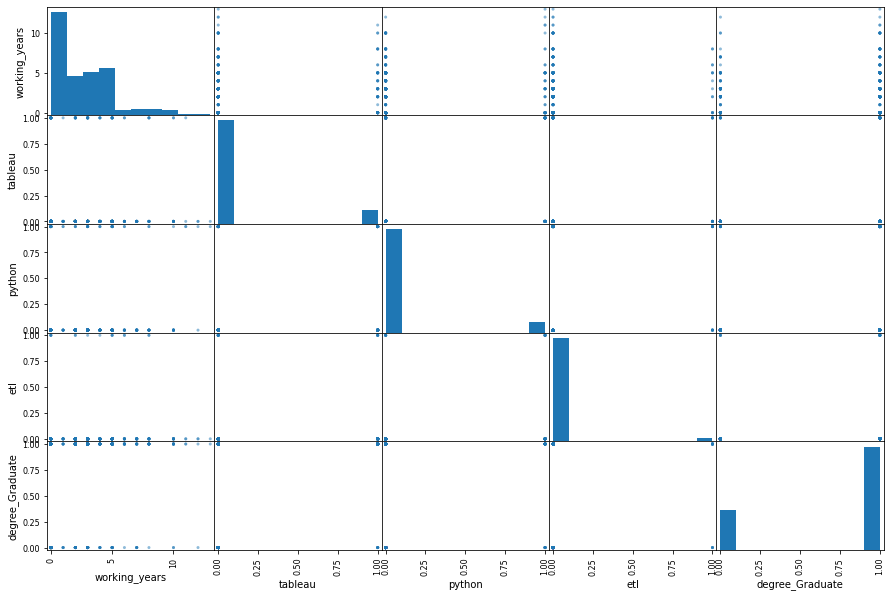

In [131]:
from pandas.plotting import scatter_matrix
features = ['working_years','tableau','python','etl','degree_Graduate']
scatter_matrix(df[features],figsize = (15,10))

In [132]:
X = df.drop('salary',axis = 1)
y = df.salary

In [116]:
# Feature Scaling
#from sklearn.preprocessing import StandardScaler
#std_scaler = StandardScaler()
#X_scaled = std_scaler.fit(X.working_years)

In [135]:
# Fit OLS, Ridge and Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model

In [152]:
# fit linear model, using Cross Validation to get est of MSE
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_score = cross_val_score(lin_reg, X, y, scoring = 'neg_mean_squared_error', cv = 10)
print(-lin_score.mean())

375.1110669796018


In [160]:
# find best Lasso result through grid search
param_grid = {'alpha':np.linspace(0.1,5,num = 100)}
lasso = linear_model.Lasso()
grid_search = GridSearchCV(lasso, param_grid, cv = 5, scoring = 'neg_mean_squared_error', return_train_score = True)
grid_search.fit(X,y)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([0.1       , 0.14949495, 0.1989899 , 0.24848485, 0.2979798 ,
       0.34747475, 0.3969697 , 0.44646465, 0.4959596 , 0.54545455,
       0.59494949, 0.64444444, 0.69393939, 0.74343434, 0.79292929,
       0.84242424, 0.89191919, 0.94141414, 0.99090909, 1.04040404,
       1.08989899, 1.13939394, 1.18888889, 1.23838384, 1.28787879,
       1.33737374, 1.38686869, 1...
       3.56464646, 3.61414141, 3.66363636, 3.71313131, 3.76262626,
       3.81212121, 3.86161616, 3.91111111, 3.96060606, 4.01010101,
       4.05959596, 4.10909091, 4.15858586, 4.20808081, 4.25757576,
       4.30707071, 4.35656566, 4.40606061, 4.45555556, 4.50505051,
       4.55454545, 4.6040404 , 4.65353535, 4.7030303 , 4.75252525,
       4.8020202 , 4.85151515, 4.9010101 , 4.95050505, 5.        ])},
             return_train_score=True, scoring='neg_mean_squared_error')

In [163]:
best_lasso = grid_search.best_estimator_
lasso_score = cross_val_score(best_lasso, X, y, scoring = 'neg_mean_squared_error', cv = 10)
print(-lasso_score.mean())

356.4805986123157


In [164]:
# Find best Ridge
# find best Lasso result through grid search
param_grid = {'alpha':np.linspace(0.1,5,num = 100)}
ridge = Ridge()
grid_search = GridSearchCV(ridge, param_grid, cv = 5, scoring = 'neg_mean_squared_error', return_train_score = True)
grid_search.fit(X,y)
best_Ridge = grid_search.best_estimator_
ridge_score = cross_val_score(best_Ridge, X, y, scoring = 'neg_mean_squared_error', cv = 10)
print(-ridge_score.mean())

368.5679225808803


In [177]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor

param_grid = [{'n_estimators':[6,10,15,20,30], 'max_features':[4,6,8,10]}]

tree_reg = DecisionTreeRegressor()

grid_search = GridSearchCV(tree_reg, param_grid, cv = 5, scoring = 'neg_mean_squared_error', return_train_score = True)

grid_search.fit(X,y)

best_DT = grid_search.best_estimator_
DT_score = cross_val_score(best_DT, X, y, scoring = 'neg_mean_squared_error', cv = 10)
print(-DT_score.mean())

ValueError: Invalid parameter n_estimators for estimator DecisionTreeRegressor(max_features=4). Check the list of available parameters with `estimator.get_params().keys()`.

In [172]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

param_grid = [{'n_estimators':[3,6,10,15,20,30], 'max_features':[2,4,6,8,10]}]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv = 5, scoring = 'neg_mean_squared_error', return_train_score = True)

grid_search.fit(X,y)

best_RF = grid_search.best_estimator_
RF_score = cross_val_score(best_RF, X, y, scoring = 'neg_mean_squared_error', cv = 10)
print(-RF_score.mean())

390.98282292538823


In [225]:
# Catboost
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size = 0.2)

from catboost import CatBoostRegressor
depth_list = [2, 3, 4, 5, 6] 
for depth in depth_list:
    catbst = CatBoostRegressor(iterations = 8000, 
                                learning_rate = 0.005,
                                depth = depth,
                                loss_function='RMSE', 
                                leaf_estimation_method = 'Gradient', 
                                eval_metric = 'Accuracy', 
                                custom_metric = 'Accuracy', 
                                use_best_model = True,
                                random_seed = 76, verbose = False)
    catbst.fit(Xtrain, ytrain, eval_set=(Xtest, ytest), plot=True)
    y_predict = catbst.predict(Xtest) 


Custom logger is already specified. Specify more than one logger at same time is not thread safe.

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

CatBoostError: catboost/private/libs/target/target_converter.cpp:378: Target with classes must contain only 2 unique values for binary classification

In [229]:
catbst = CatBoostRegressor(iterations = 8000, 
                                learning_rate = 0.005,
                                depth = 3,
                                loss_function='RMSE')
catbst.fit(Xtrain, ytrain)

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

0:	learn: 19.4944399	total: 51.5ms	remaining: 6m 52s
1:	learn: 19.4893638	total: 52.1ms	remaining: 3m 28s
2:	learn: 19.4864341	total: 52.4ms	remaining: 2m 19s
3:	learn: 19.4795604	total: 52.7ms	remaining: 1m 45s
4:	learn: 19.4728973	total: 53.2ms	remaining: 1m 25s
5:	learn: 19.4653564	total: 53.5ms	remaining: 1m 11s
6:	learn: 19.4581337	total: 53.9ms	remaining: 1m 1s
7:	learn: 19.4525673	total: 54.3ms	remaining: 54.2s
8:	learn: 19.4500837	total: 54.6ms	remaining: 48.5s
9:	learn: 19.4449231	total: 55ms	remaining: 43.9s
10:	learn: 19.4371832	total: 55.2ms	remaining: 40.1s
11:	learn: 19.4321042	total: 55.6ms	remaining: 37s
12:	learn: 19.4279775	total: 56ms	remaining: 34.4s
13:	learn: 19.4212646	total: 56.3ms	remaining: 32.1s
14:	learn: 19.4166901	total: 56.7ms	remaining: 30.2s
15:	learn: 19.4123507	total: 57.1ms	remaining: 28.5s
16:	learn: 19.4061416	total: 57.4ms	remaining: 26.9s
17:	learn: 19.3989671	total: 57.7ms	remaining: 25.6s
18:	learn: 19.3916930	total: 58.1ms	remaining: 24.4s
19:

499:	learn: 18.1805499	total: 190ms	remaining: 2.85s
500:	learn: 18.1782143	total: 191ms	remaining: 2.85s
501:	learn: 18.1766619	total: 191ms	remaining: 2.85s
502:	learn: 18.1754857	total: 191ms	remaining: 2.85s
503:	learn: 18.1732700	total: 191ms	remaining: 2.84s
504:	learn: 18.1709887	total: 191ms	remaining: 2.84s
505:	learn: 18.1704653	total: 192ms	remaining: 2.84s
506:	learn: 18.1697896	total: 192ms	remaining: 2.84s
507:	learn: 18.1663031	total: 193ms	remaining: 2.84s
508:	learn: 18.1631927	total: 193ms	remaining: 2.84s
509:	learn: 18.1620694	total: 193ms	remaining: 2.83s
510:	learn: 18.1607918	total: 193ms	remaining: 2.83s
511:	learn: 18.1576358	total: 193ms	remaining: 2.83s
512:	learn: 18.1564129	total: 194ms	remaining: 2.83s
513:	learn: 18.1554571	total: 194ms	remaining: 2.83s
514:	learn: 18.1545187	total: 194ms	remaining: 2.82s
515:	learn: 18.1539635	total: 195ms	remaining: 2.82s
516:	learn: 18.1532050	total: 195ms	remaining: 2.82s
517:	learn: 18.1525063	total: 195ms	remaining:

1104:	learn: 17.5456624	total: 343ms	remaining: 2.14s
1105:	learn: 17.5444856	total: 344ms	remaining: 2.14s
1106:	learn: 17.5437845	total: 344ms	remaining: 2.14s
1107:	learn: 17.5422020	total: 344ms	remaining: 2.14s
1108:	learn: 17.5417961	total: 345ms	remaining: 2.14s
1109:	learn: 17.5407158	total: 345ms	remaining: 2.14s
1110:	learn: 17.5401378	total: 345ms	remaining: 2.14s
1111:	learn: 17.5396660	total: 346ms	remaining: 2.14s
1112:	learn: 17.5392295	total: 346ms	remaining: 2.14s
1113:	learn: 17.5389222	total: 346ms	remaining: 2.14s
1114:	learn: 17.5381785	total: 346ms	remaining: 2.14s
1115:	learn: 17.5365897	total: 347ms	remaining: 2.14s
1116:	learn: 17.5356150	total: 347ms	remaining: 2.14s
1117:	learn: 17.5351758	total: 347ms	remaining: 2.14s
1118:	learn: 17.5333307	total: 348ms	remaining: 2.14s
1119:	learn: 17.5321671	total: 348ms	remaining: 2.14s
1120:	learn: 17.5318074	total: 348ms	remaining: 2.14s
1121:	learn: 17.5313035	total: 349ms	remaining: 2.14s
1122:	learn: 17.5308389	tota

1617:	learn: 17.1547062	total: 479ms	remaining: 1.89s
1618:	learn: 17.1522349	total: 479ms	remaining: 1.89s
1619:	learn: 17.1519909	total: 479ms	remaining: 1.89s
1620:	learn: 17.1518042	total: 480ms	remaining: 1.89s
1621:	learn: 17.1513022	total: 480ms	remaining: 1.89s
1622:	learn: 17.1507471	total: 480ms	remaining: 1.89s
1623:	learn: 17.1503192	total: 480ms	remaining: 1.89s
1624:	learn: 17.1499448	total: 481ms	remaining: 1.89s
1625:	learn: 17.1497955	total: 481ms	remaining: 1.89s
1626:	learn: 17.1493246	total: 481ms	remaining: 1.88s
1627:	learn: 17.1468714	total: 481ms	remaining: 1.88s
1628:	learn: 17.1465555	total: 482ms	remaining: 1.88s
1629:	learn: 17.1460652	total: 482ms	remaining: 1.88s
1630:	learn: 17.1455181	total: 482ms	remaining: 1.88s
1631:	learn: 17.1441265	total: 482ms	remaining: 1.88s
1632:	learn: 17.1439331	total: 483ms	remaining: 1.88s
1633:	learn: 17.1435073	total: 483ms	remaining: 1.88s
1634:	learn: 17.1432964	total: 483ms	remaining: 1.88s
1635:	learn: 17.1430566	tota

2259:	learn: 16.7530456	total: 634ms	remaining: 1.61s
2260:	learn: 16.7517984	total: 635ms	remaining: 1.61s
2261:	learn: 16.7499201	total: 635ms	remaining: 1.61s
2262:	learn: 16.7498154	total: 635ms	remaining: 1.61s
2263:	learn: 16.7490513	total: 635ms	remaining: 1.61s
2264:	learn: 16.7476173	total: 636ms	remaining: 1.61s
2265:	learn: 16.7467482	total: 636ms	remaining: 1.61s
2266:	learn: 16.7451178	total: 636ms	remaining: 1.61s
2267:	learn: 16.7449915	total: 636ms	remaining: 1.61s
2268:	learn: 16.7448871	total: 637ms	remaining: 1.61s
2269:	learn: 16.7437974	total: 637ms	remaining: 1.61s
2270:	learn: 16.7436934	total: 637ms	remaining: 1.61s
2271:	learn: 16.7403311	total: 638ms	remaining: 1.61s
2272:	learn: 16.7392510	total: 638ms	remaining: 1.61s
2273:	learn: 16.7389302	total: 638ms	remaining: 1.61s
2274:	learn: 16.7381043	total: 638ms	remaining: 1.61s
2275:	learn: 16.7374128	total: 639ms	remaining: 1.61s
2276:	learn: 16.7373126	total: 639ms	remaining: 1.6s
2277:	learn: 16.7364549	total

2813:	learn: 16.3834741	total: 790ms	remaining: 1.46s
2814:	learn: 16.3825804	total: 790ms	remaining: 1.46s
2815:	learn: 16.3811175	total: 791ms	remaining: 1.46s
2816:	learn: 16.3807700	total: 791ms	remaining: 1.46s
2817:	learn: 16.3794907	total: 791ms	remaining: 1.46s
2818:	learn: 16.3788683	total: 792ms	remaining: 1.46s
2819:	learn: 16.3781382	total: 793ms	remaining: 1.46s
2820:	learn: 16.3767050	total: 793ms	remaining: 1.46s
2821:	learn: 16.3760699	total: 793ms	remaining: 1.46s
2822:	learn: 16.3755881	total: 793ms	remaining: 1.46s
2823:	learn: 16.3754065	total: 794ms	remaining: 1.45s
2824:	learn: 16.3749180	total: 794ms	remaining: 1.45s
2825:	learn: 16.3748430	total: 794ms	remaining: 1.45s
2826:	learn: 16.3747147	total: 795ms	remaining: 1.45s
2827:	learn: 16.3744412	total: 795ms	remaining: 1.45s
2828:	learn: 16.3735059	total: 795ms	remaining: 1.45s
2829:	learn: 16.3726208	total: 796ms	remaining: 1.45s
2830:	learn: 16.3714586	total: 796ms	remaining: 1.45s
2831:	learn: 16.3705811	tota

3401:	learn: 16.0135898	total: 946ms	remaining: 1.28s
3402:	learn: 16.0135291	total: 946ms	remaining: 1.28s
3403:	learn: 16.0122759	total: 947ms	remaining: 1.28s
3404:	learn: 16.0121173	total: 947ms	remaining: 1.28s
3405:	learn: 16.0120455	total: 947ms	remaining: 1.28s
3406:	learn: 16.0118752	total: 947ms	remaining: 1.28s
3407:	learn: 16.0106321	total: 948ms	remaining: 1.28s
3408:	learn: 16.0102236	total: 948ms	remaining: 1.28s
3409:	learn: 16.0095882	total: 948ms	remaining: 1.28s
3410:	learn: 16.0092931	total: 948ms	remaining: 1.27s
3411:	learn: 16.0092328	total: 949ms	remaining: 1.27s
3412:	learn: 16.0071719	total: 949ms	remaining: 1.27s
3413:	learn: 16.0066008	total: 949ms	remaining: 1.27s
3414:	learn: 16.0063448	total: 949ms	remaining: 1.27s
3415:	learn: 16.0057595	total: 950ms	remaining: 1.27s
3416:	learn: 16.0055531	total: 950ms	remaining: 1.27s
3417:	learn: 16.0052351	total: 950ms	remaining: 1.27s
3418:	learn: 16.0049415	total: 951ms	remaining: 1.27s
3419:	learn: 16.0028981	tota

4041:	learn: 15.6770144	total: 1.1s	remaining: 1.08s
4042:	learn: 15.6747751	total: 1.1s	remaining: 1.08s
4043:	learn: 15.6741629	total: 1.1s	remaining: 1.08s
4044:	learn: 15.6738403	total: 1.1s	remaining: 1.08s
4045:	learn: 15.6734859	total: 1.1s	remaining: 1.08s
4046:	learn: 15.6732418	total: 1.1s	remaining: 1.08s
4047:	learn: 15.6723870	total: 1.1s	remaining: 1.08s
4048:	learn: 15.6711055	total: 1.1s	remaining: 1.08s
4049:	learn: 15.6708733	total: 1.1s	remaining: 1.08s
4050:	learn: 15.6705535	total: 1.1s	remaining: 1.08s
4051:	learn: 15.6702319	total: 1.1s	remaining: 1.08s
4052:	learn: 15.6700115	total: 1.1s	remaining: 1.07s
4053:	learn: 15.6693145	total: 1.1s	remaining: 1.07s
4054:	learn: 15.6686934	total: 1.1s	remaining: 1.07s
4055:	learn: 15.6680175	total: 1.1s	remaining: 1.07s
4056:	learn: 15.6679649	total: 1.1s	remaining: 1.07s
4057:	learn: 15.6653574	total: 1.11s	remaining: 1.07s
4058:	learn: 15.6644655	total: 1.11s	remaining: 1.07s
4059:	learn: 15.6643758	total: 1.11s	remaini

4653:	learn: 15.3839605	total: 1.26s	remaining: 904ms
4654:	learn: 15.3838581	total: 1.26s	remaining: 904ms
4655:	learn: 15.3837217	total: 1.26s	remaining: 904ms
4656:	learn: 15.3836818	total: 1.26s	remaining: 903ms
4657:	learn: 15.3834803	total: 1.26s	remaining: 903ms
4658:	learn: 15.3833399	total: 1.26s	remaining: 903ms
4659:	learn: 15.3829163	total: 1.26s	remaining: 903ms
4660:	learn: 15.3822355	total: 1.26s	remaining: 903ms
4661:	learn: 15.3819372	total: 1.26s	remaining: 902ms
4662:	learn: 15.3799675	total: 1.26s	remaining: 902ms
4663:	learn: 15.3793110	total: 1.26s	remaining: 902ms
4664:	learn: 15.3790150	total: 1.26s	remaining: 901ms
4665:	learn: 15.3785075	total: 1.26s	remaining: 901ms
4666:	learn: 15.3779801	total: 1.26s	remaining: 901ms
4667:	learn: 15.3776874	total: 1.26s	remaining: 901ms
4668:	learn: 15.3775477	total: 1.26s	remaining: 900ms
4669:	learn: 15.3772344	total: 1.26s	remaining: 900ms
4670:	learn: 15.3769722	total: 1.26s	remaining: 900ms
4671:	learn: 15.3763728	tota

5246:	learn: 15.1314419	total: 1.41s	remaining: 740ms
5247:	learn: 15.1307272	total: 1.41s	remaining: 739ms
5248:	learn: 15.1305228	total: 1.41s	remaining: 739ms
5249:	learn: 15.1297232	total: 1.41s	remaining: 739ms
5250:	learn: 15.1294227	total: 1.41s	remaining: 739ms
5251:	learn: 15.1292227	total: 1.41s	remaining: 738ms
5252:	learn: 15.1280238	total: 1.41s	remaining: 738ms
5253:	learn: 15.1274266	total: 1.41s	remaining: 738ms
5254:	learn: 15.1272285	total: 1.41s	remaining: 738ms
5255:	learn: 15.1269688	total: 1.41s	remaining: 737ms
5256:	learn: 15.1267705	total: 1.41s	remaining: 737ms
5257:	learn: 15.1263900	total: 1.41s	remaining: 737ms
5258:	learn: 15.1262316	total: 1.41s	remaining: 737ms
5259:	learn: 15.1258868	total: 1.41s	remaining: 736ms
5260:	learn: 15.1255341	total: 1.41s	remaining: 736ms
5261:	learn: 15.1248906	total: 1.41s	remaining: 736ms
5262:	learn: 15.1233722	total: 1.41s	remaining: 735ms
5263:	learn: 15.1218673	total: 1.41s	remaining: 735ms
5264:	learn: 15.1217875	tota

5837:	learn: 14.9034125	total: 1.56s	remaining: 579ms
5838:	learn: 14.9019099	total: 1.56s	remaining: 579ms
5839:	learn: 14.9018703	total: 1.56s	remaining: 578ms
5840:	learn: 14.9003813	total: 1.56s	remaining: 578ms
5841:	learn: 14.8999834	total: 1.56s	remaining: 578ms
5842:	learn: 14.8993788	total: 1.56s	remaining: 578ms
5843:	learn: 14.8992602	total: 1.56s	remaining: 577ms
5844:	learn: 14.8990167	total: 1.56s	remaining: 577ms
5845:	learn: 14.8988076	total: 1.56s	remaining: 577ms
5846:	learn: 14.8986390	total: 1.56s	remaining: 577ms
5847:	learn: 14.8983977	total: 1.57s	remaining: 576ms
5848:	learn: 14.8981621	total: 1.57s	remaining: 576ms
5849:	learn: 14.8978684	total: 1.57s	remaining: 576ms
5850:	learn: 14.8977237	total: 1.57s	remaining: 576ms
5851:	learn: 14.8966001	total: 1.57s	remaining: 575ms
5852:	learn: 14.8964531	total: 1.57s	remaining: 575ms
5853:	learn: 14.8963780	total: 1.57s	remaining: 575ms
5854:	learn: 14.8963391	total: 1.57s	remaining: 575ms
5855:	learn: 14.8957781	tota

6431:	learn: 14.7116449	total: 1.72s	remaining: 419ms
6432:	learn: 14.7112982	total: 1.72s	remaining: 418ms
6433:	learn: 14.7105228	total: 1.72s	remaining: 418ms
6434:	learn: 14.7102751	total: 1.72s	remaining: 418ms
6435:	learn: 14.7098698	total: 1.72s	remaining: 418ms
6436:	learn: 14.7093571	total: 1.72s	remaining: 417ms
6437:	learn: 14.7092010	total: 1.72s	remaining: 417ms
6438:	learn: 14.7089268	total: 1.72s	remaining: 417ms
6439:	learn: 14.7086808	total: 1.72s	remaining: 417ms
6440:	learn: 14.7084365	total: 1.72s	remaining: 416ms
6441:	learn: 14.7080464	total: 1.72s	remaining: 416ms
6442:	learn: 14.7076628	total: 1.72s	remaining: 416ms
6443:	learn: 14.7071281	total: 1.72s	remaining: 416ms
6444:	learn: 14.7068522	total: 1.72s	remaining: 415ms
6445:	learn: 14.7064461	total: 1.72s	remaining: 415ms
6446:	learn: 14.7061036	total: 1.72s	remaining: 415ms
6447:	learn: 14.7058636	total: 1.72s	remaining: 414ms
6448:	learn: 14.7056759	total: 1.72s	remaining: 414ms
6449:	learn: 14.7054729	tota

6848:	learn: 14.5860930	total: 1.86s	remaining: 313ms
6849:	learn: 14.5859605	total: 1.86s	remaining: 312ms
6850:	learn: 14.5846220	total: 1.86s	remaining: 312ms
6851:	learn: 14.5845932	total: 1.86s	remaining: 312ms
6852:	learn: 14.5844271	total: 1.86s	remaining: 312ms
6853:	learn: 14.5842300	total: 1.86s	remaining: 311ms
6854:	learn: 14.5839446	total: 1.86s	remaining: 311ms
6855:	learn: 14.5832105	total: 1.86s	remaining: 311ms
6856:	learn: 14.5827255	total: 1.86s	remaining: 311ms
6857:	learn: 14.5826410	total: 1.86s	remaining: 310ms
6858:	learn: 14.5822876	total: 1.86s	remaining: 310ms
6859:	learn: 14.5817565	total: 1.86s	remaining: 310ms
6860:	learn: 14.5815069	total: 1.86s	remaining: 310ms
6861:	learn: 14.5810035	total: 1.86s	remaining: 309ms
6862:	learn: 14.5807867	total: 1.86s	remaining: 309ms
6863:	learn: 14.5805815	total: 1.86s	remaining: 309ms
6864:	learn: 14.5804914	total: 1.87s	remaining: 309ms
6865:	learn: 14.5804370	total: 1.87s	remaining: 308ms
6866:	learn: 14.5800228	tota

7370:	learn: 14.4360688	total: 2.01s	remaining: 172ms
7371:	learn: 14.4360499	total: 2.02s	remaining: 172ms
7372:	learn: 14.4359346	total: 2.02s	remaining: 171ms
7373:	learn: 14.4353813	total: 2.02s	remaining: 171ms
7374:	learn: 14.4353311	total: 2.02s	remaining: 171ms
7375:	learn: 14.4346587	total: 2.02s	remaining: 171ms
7376:	learn: 14.4344957	total: 2.02s	remaining: 170ms
7377:	learn: 14.4340685	total: 2.02s	remaining: 170ms
7378:	learn: 14.4338448	total: 2.02s	remaining: 170ms
7379:	learn: 14.4335233	total: 2.02s	remaining: 169ms
7380:	learn: 14.4333370	total: 2.02s	remaining: 169ms
7381:	learn: 14.4320923	total: 2.02s	remaining: 169ms
7382:	learn: 14.4319445	total: 2.02s	remaining: 169ms
7383:	learn: 14.4319120	total: 2.02s	remaining: 168ms
7384:	learn: 14.4316912	total: 2.02s	remaining: 168ms
7385:	learn: 14.4312677	total: 2.02s	remaining: 168ms
7386:	learn: 14.4311054	total: 2.02s	remaining: 168ms
7387:	learn: 14.4300037	total: 2.02s	remaining: 167ms
7388:	learn: 14.4298571	tota

7963:	learn: 14.2867971	total: 2.17s	remaining: 9.8ms
7964:	learn: 14.2866958	total: 2.17s	remaining: 9.53ms
7965:	learn: 14.2863867	total: 2.17s	remaining: 9.26ms
7966:	learn: 14.2861886	total: 2.17s	remaining: 8.98ms
7967:	learn: 14.2860714	total: 2.17s	remaining: 8.71ms
7968:	learn: 14.2856582	total: 2.17s	remaining: 8.44ms
7969:	learn: 14.2855894	total: 2.17s	remaining: 8.17ms
7970:	learn: 14.2855704	total: 2.17s	remaining: 7.89ms
7971:	learn: 14.2851907	total: 2.17s	remaining: 7.62ms
7972:	learn: 14.2851704	total: 2.17s	remaining: 7.35ms
7973:	learn: 14.2850153	total: 2.17s	remaining: 7.08ms
7974:	learn: 14.2840571	total: 2.17s	remaining: 6.81ms
7975:	learn: 14.2838739	total: 2.17s	remaining: 6.53ms
7976:	learn: 14.2835347	total: 2.17s	remaining: 6.26ms
7977:	learn: 14.2835130	total: 2.17s	remaining: 5.99ms
7978:	learn: 14.2833401	total: 2.17s	remaining: 5.72ms
7979:	learn: 14.2832122	total: 2.17s	remaining: 5.45ms
7980:	learn: 14.2828912	total: 2.17s	remaining: 5.17ms
7981:	learn

In [231]:
ypred = catbst.predict(Xtest)
print(mean_squared_error(ypred,ytest))

419.4845104039098
